In [3]:
#importing libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [4]:
# Define the path to the new dataset 
project_folder_path = r"C:\Users\marci\15-07-2024Instacart Basket Analysis\02 Data"

In [7]:
# Import orders_products_combined.pkl into a DataFrame
df_ords_prods_merge = pd.read_pickle(r'C:\Users\marci\15-07-2024Instacart Basket Analysis\02 Data\Prepared Data\ords_prods_merge.pkl')

In [6]:
df_ords_prods_merge.head()

,Unnamed: 0,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,aisle_id,department_id,prices,merge_flag,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,order_frequency_flag
0,0,2539329,1,1,2,8,0.0,196,1,0,...,77,7,9.0,both,Regularly busy,Average orders,10,New customer,Low spender,Regular customer
1,0,2539329,1,1,2,8,0.0,14084,2,0,...,91,16,12.5,both,Regularly busy,Average orders,10,New customer,Low spender,Regular customer
2,0,2539329,1,1,2,8,0.0,12427,3,0,...,23,19,4.4,both,Regularly busy,Average orders,10,New customer,Low spender,Regular customer
3,0,2539329,1,1,2,8,0.0,26088,4,0,...,23,19,4.7,both,Regularly busy,Average orders,10,New customer,Low spender,Regular customer
4,0,2539329,1,1,2,8,0.0,26405,5,0,...,54,17,1.0,both,Regularly busy,Average orders,10,New customer,Low spender,Regular customer


<Axes: xlabel='order_dow'>

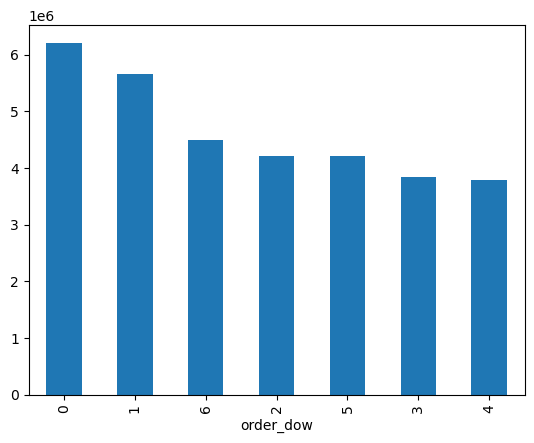

In [9]:
# Creating Bar Charts
df_ords_prods_merge['order_dow'].value_counts().plot.bar()


AttributeError: module 'matplotlib.pyplot' has no attribute 'ticker'

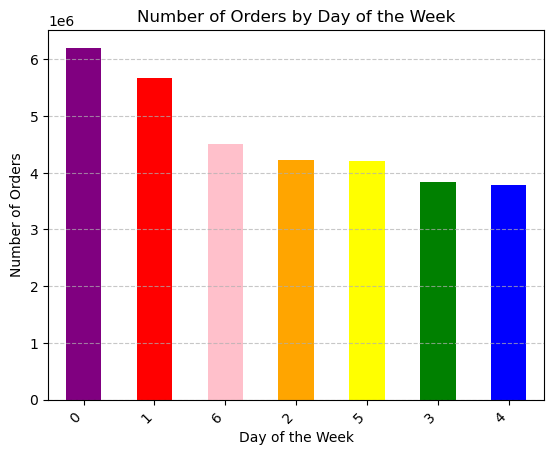

In [15]:
bar = df_ords_prods_merge['order_dow'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])
# Add a title
plt.title("Number of Orders by Day of the Week")

# Add axis labels
plt.xlabel("Day of the Week")
plt.ylabel("Number of Orders")

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Reorder weekdays on x-axis (optional)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability 
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.gca().xaxis.set_major_locator(plt.ticker.FixedLocator(days))

# Display the chart
plt.show()


In [13]:
#exporting Bar
bar.figure.savefig(os.path.join(r"C:\Users\marci\15-07-2024Instacart Basket Analysis\04 Analysis\Visualizations\bar_order_dow.png"))

# Histograms

<Axes: ylabel='Frequency'>

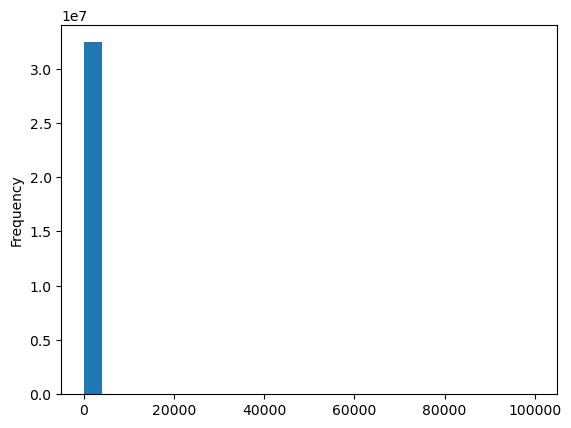

In [15]:
df_ords_prods_merge['prices'].plot.hist(bins = 25)

In [17]:
# Strage results Max(Prices)
df_ords_prods_merge['prices'].describe()

count    3.243303e+07
mean     1.198133e+01
std      4.954401e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [19]:
df_ords_prods_merge['prices'].mean()

11.981329083344948

In [21]:
df_ords_prods_merge['prices'].median()

7.4

In [23]:
df_ords_prods_merge['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

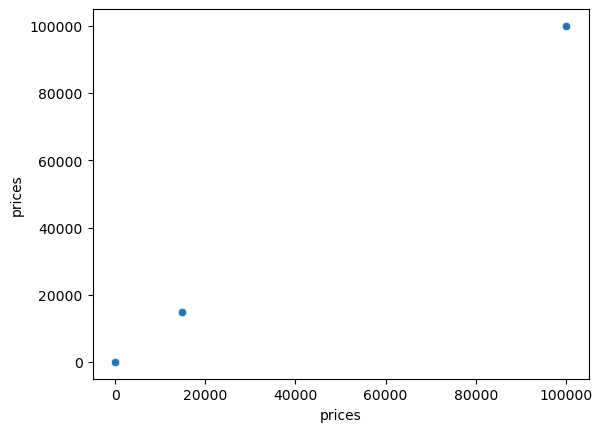

In [36]:
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_merge)

In [25]:
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] > 100]

,Unnamed: 0,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,aisle_id,department_id,prices,merge_flag,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,order_frequency_flag
1576,171,912404,17,12,2,14,5.0,21553,5,0,...,108,16,14900.0,both,Regularly busy,Most orders,40,Regular customer,High spender,Frequent customer
1638,181,603376,17,22,6,16,4.0,21553,3,1,...,108,16,14900.0,both,Regularly busy,Most orders,40,Regular customer,High spender,Frequent customer
16532,1944,3264360,135,2,2,21,13.0,21553,6,0,...,108,16,14900.0,both,Regularly busy,Average orders,4,New customer,High spender,Regular customer
16538,1945,892534,135,3,0,8,12.0,21553,3,1,...,108,16,14900.0,both,Busiest days,Average orders,4,New customer,High spender,Regular customer
53708,5708,229704,342,8,1,19,30.0,21553,9,0,...,108,16,14900.0,both,Busiest days,Average orders,16,Regular customer,High spender,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32348606,3411856,3172853,205650,18,1,9,7.0,21553,17,1,...,108,16,14900.0,both,Busiest days,Most orders,25,Regular customer,High spender,Frequent customer
32375838,3414691,2504315,205818,3,5,15,3.0,21553,13,0,...,108,16,14900.0,both,Regularly busy,Most orders,25,Regular customer,High spender,Regular customer
32375848,3414693,1108388,205818,5,4,5,1.0,21553,5,1,...,108,16,14900.0,both,Slowest days,Fewest orders,25,Regular customer,High spender,Regular customer
32408678,3418470,1916142,206049,1,2,17,0.0,21553,2,0,...,108,16,14900.0,both,Regularly busy,Average orders,5,New customer,High spender,Frequent customer


In [27]:
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [29]:
df_ords_prods_merge['prices'].max()

25.0

# Histogram with after cleaning Data

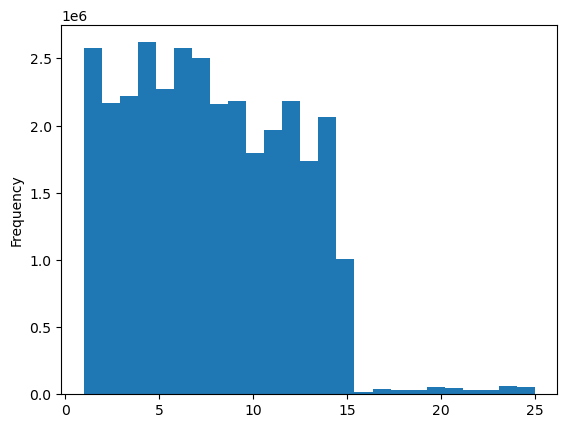

In [31]:
hist=df_ords_prods_merge['prices'].plot.hist(bins = 25)

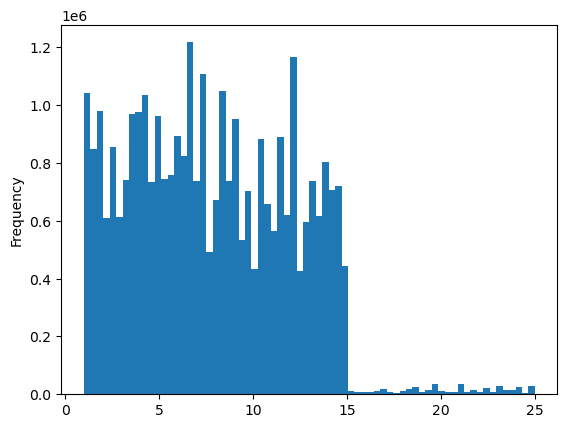

In [33]:
hist2=df_ords_prods_merge['prices'].plot.hist(bins = 70)

In [35]:
#exporting Histograms
hist.figure.savefig(os.path.join(r"C:\Users\marci\15-07-2024Instacart Basket Analysis\04 Analysis\Visualizations\hist_order_dow.png"))

In [37]:
hist2.figure.savefig(os.path.join(r"C:\Users\marci\15-07-2024Instacart Basket Analysis\04 Analysis\Visualizations\hist2_order_dow.png"))

In [39]:
print(df_ords_prods_merge.dtypes)

Unnamed: 0                   int64
order_id                     int64
user_id                      int64
order_number                 int64
order_dow                    int64
order_hour_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
existing_merge            category
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
merge_flag                category
busiest_days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
spending_flag               object
order_frequency_flag        object
dtype: object


In [41]:
df_ords_prods_merge.to_pickle(r"C:\Users\marci\15-07-2024Instacart Basket Analysis\02 Data\Prepared Data\ords_prods_merge.pkl")